# G2M insight for Cab Investment firm EDA

In [3]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

# Reading csv file into dataframes and checking for null values

In [4]:
Cust_data=pd.read_csv("Customer_ID.csv")
Cust_data.isnull().sum().sum()

0

In [5]:
Trans_data=pd.read_csv("Transaction_ID.csv")
Trans_data.isnull().sum().sum()

0

In [6]:
Cust_info=pd.merge(Trans_data, Cust_data)
#Cust_info.isnull().sum().sum()
Cust_info


,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,Male,28,10813
1,10351127,29290,Cash,Male,28,10813
2,10412921,29290,Card,Male,28,10813
3,10000012,27703,Card,Male,27,9237
4,10320494,27703,Card,Male,27,9237
...,...,...,...,...,...,...
440093,10439799,12490,Cash,Male,33,18713
440094,10439820,14971,Card,Male,30,15346
440095,10439838,41414,Card,Male,38,3960
440096,10439840,41677,Cash,Male,23,19454


In [7]:
City=pd.read_csv("City.csv")
City.isnull().sum().sum()

0

In [8]:
Cab=pd.read_csv("Cab_Data.csv")
Cab.isnull().sum().sum()


0

In [9]:
Cab["Company"].isnull().values.any()
Cab.isnull().sum().sum()

0

Checking range and outliers

In [10]:
minvalue = Cab['Price Charged'].min()
maxvalue= Cab['Price Charged'].max()
  
print(maxvalue,minvalue)

2048.03 15.6


In [11]:
minvalueage = Cust_data['Age'].min()
maxvalueage = Cust_data['Age'].max()
  
print(maxvalueage,minvalueage)

65 18


# Deriving features

In [12]:
Cab["Profit"]=Cab["Price Charged"]-Cab["Cost of Trip"]
Cab

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440
...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420


In [13]:
Cust_Cab=pd.merge(Cust_info,Cab)
Cust_Cab

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,10000011,29290,Card,Male,28,10813,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150
1,10351127,29290,Cash,Male,28,10813,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772
2,10412921,29290,Card,Male,28,10813,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480
3,10000012,27703,Card,Male,27,9237,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660
4,10320494,27703,Card,Male,27,9237,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,38520,Card,Female,42,19417,43107,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,47.2656
359388,10439799,12490,Cash,Male,33,18713,43103,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,105.0980
359389,10439838,41414,Card,Male,38,3960,43104,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,71.2100
359390,10439840,41677,Cash,Male,23,19454,43106,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,21.8600


# EDA starts here

In [14]:
Yellow_cab=[Cust_Cab["Company"] , Cust_Cab["Customer ID"]]
head=["Company","Customer ID"]
cab_cust=pd.concat(Yellow_cab,axis=1, keys=head)
cab_cust

,Company,Customer ID
0,Pink Cab,29290
1,Yellow Cab,29290
2,Yellow Cab,29290
3,Pink Cab,27703
4,Yellow Cab,27703
...,...,...
359387,Yellow Cab,38520
359388,Yellow Cab,12490
359389,Yellow Cab,41414
359390,Yellow Cab,41677


In [15]:
Yellowcab_CHICAGO=Cab[(Cab["Company"]=="Yellow Cab") & (Cab["City"]=="CHICAGO IL")]
Yellowcab_NEW=Cab[(Cab["Company"]=="Yellow Cab") & (Cab["City"]=="NEW YORK NY")]
Yellowcab_LOS=Cab[(Cab["Company"]=="Yellow Cab") & (Cab["City"]=="LOS ANGELES CA")]
Yellowcab_MIA=Cab[(Cab["Company"]=="Yellow Cab") & (Cab["City"]=="MIAMI FL")]
Yellowcab_SILI=Cab[(Cab["Company"]=="Yellow Cab") & (Cab["City"]=="SILICON VALLEY")]
Yellowcab_ORA=Cab[(Cab["Company"]=="Yellow Cab") & (Cab["City"]=="ORANGE COUNTY")]
Yellowcab_SAN=Cab[(Cab["Company"]=="Yellow Cab") & (Cab["City"]=="SAN DIEGO CA")]
Yellowcab_PHOENIX=Cab[(Cab["Company"]=="Yellow Cab") & (Cab["City"]=="PHOENIX AZ")]
Yellowcab_DALLAS=Cab[(Cab["Company"]=="Yellow Cab") & (Cab["City"]=="DALLAS TX")]
Yellowcab_ATLA=Cab[(Cab["Company"]=="Yellow Cab") & (Cab["City"]=="ATLANTA GA")]
Yellowcab_DENV=Cab[(Cab["Company"]=="Yellow Cab") & (Cab["City"]=="DENVER CO")]
Yellowcab_AUST=Cab[(Cab["Company"]=="Yellow Cab") & (Cab["City"]=="AUSTIN TX")]
Yellowcab_SEATTLE=Cab[(Cab["Company"]=="Yellow Cab") & (Cab["City"]=="SEATTLE WA")]
Yellowcab_TUCSON=Cab[(Cab["Company"]=="Yellow Cab") & (Cab["City"]=="TUCSON AZ")]
Yellowcab_SANFra=Cab[(Cab["Company"]=="Yellow Cab") & (Cab["City"]=="SAN FRANCISCO CA")]
Yellowcab_SACRAMENTO=Cab[(Cab["Company"]=="Yellow Cab") & (Cab["City"]=="SACRAMENTO CA")]
Yellowcab_PITTSBURGH=Cab[(Cab["Company"]=="Yellow Cab") & (Cab["City"]=="PITTSBURGH PA")]
Yellowcab_WASHINGTON=Cab[(Cab["Company"]=="Yellow Cab") & (Cab["City"]=="WASHINGTON DC")]
Yellowcab_NASHVILLE=Cab[(Cab["Company"]=="Yellow Cab") & (Cab["City"]=="NASHVILLE TN")]
Yellowcab_BOSTON=Cab[(Cab["Company"]=="Yellow Cab") & (Cab["City"]=="BOSTON MA")]

In [16]:
Pinkcab_CHICAGO=Cab[(Cab["Company"]=="Pink Cab") & (Cab["City"]=="CHICAGO IL")]
Pinkcab_NEW=Cab[(Cab["Company"]=="Pink Cab") & (Cab["City"]=="NEW YORK NY")]
Pinkcab_LOS=Cab[(Cab["Company"]=="Pink Cab") & (Cab["City"]=="LOS ANGELES CA")]
Pinkcab_MIA=Cab[(Cab["Company"]=="Pink Cab") & (Cab["City"]=="MIAMI FL")]
Pinkcab_SILI=Cab[(Cab["Company"]=="Pink Cab") & (Cab["City"]=="SILICON VALLEY")]
Pinkcab_ORA=Cab[(Cab["Company"]=="Pink Cab") & (Cab["City"]=="ORANGE COUNTY")]
Pinkcab_SAN=Cab[(Cab["Company"]=="Pink Cab") & (Cab["City"]=="SAN DIEGO CA")]
Pinkcab_PHOENIX=Cab[(Cab["Company"]=="Pink Cab") & (Cab["City"]=="PHOENIX AZ")]
Pinkcab_DALLAS=Cab[(Cab["Company"]=="Pink Cab") & (Cab["City"]=="DALLAS TX")]
Pinkcab_ATLA=Cab[(Cab["Company"]=="Pink Cab") & (Cab["City"]=="ATLANTA GA")]
Pinkcab_DENV=Cab[(Cab["Company"]=="Pink Cab") & (Cab["City"]=="DENVER CO")]
Pinkcab_AUST=Cab[(Cab["Company"]=="Pink Cab") & (Cab["City"]=="AUSTIN TX")]
Pinkcab_SEATTLE=Cab[(Cab["Company"]=="Pink Cab") & (Cab["City"]=="SEATTLE WA")]
Pinkcab_TUCSON=Cab[(Cab["Company"]=="Pink Cab") & (Cab["City"]=="TUCSON AZ")]
Pinkcab_SANFra=Cab[(Cab["Company"]=="Pink Cab") & (Cab["City"]=="SAN FRANCISCO CA")]
Pinkcab_SACRAMENTO=Cab[(Cab["Company"]=="Pink Cab") & (Cab["City"]=="SACRAMENTO CA")]
Pinkcab_PITTSBURGH=Cab[(Cab["Company"]=="Pink Cab") & (Cab["City"]=="PITTSBURGH PA")]
Pinkcab_WASHINGTON=Cab[(Cab["Company"]=="Pink Cab") & (Cab["City"]=="WASHINGTON DC")]
Pinkcab_NASHVILLE=Cab[(Cab["Company"]=="Pink Cab") & (Cab["City"]=="NASHVILLE TN")]
Pinkcab_BOSTON=Cab[(Cab["Company"]=="Pink Cab") & (Cab["City"]=="BOSTON MA")]

In [17]:
City["Yellow cab"]=[Yellowcab_NEW.shape[0],Yellowcab_CHICAGO.shape[0],Yellowcab_LOS.shape[0],Yellowcab_MIA.shape[0],Yellowcab_SILI.shape[0],Yellowcab_ORA.shape[0],Yellowcab_SAN.shape[0]
,Yellowcab_PHOENIX.shape[0],Yellowcab_DALLAS.shape[0],Yellowcab_ATLA.shape[0],Yellowcab_DENV.shape[0],Yellowcab_AUST.shape[0],Yellowcab_SEATTLE.shape[0],Yellowcab_TUCSON.shape[0],Yellowcab_SANFra.shape[0],Yellowcab_SACRAMENTO.shape[0]
,Yellowcab_PITTSBURGH.shape[0],Yellowcab_WASHINGTON.shape[0],Yellowcab_NASHVILLE.shape[0],Yellowcab_BOSTON.shape[0]]
City

,City,Population,Users,Yellow cab
0,NEW YORK NY,"8,405,837","302,149",85918
1,CHICAGO IL,"1,955,130","164,468",47264
2,LOS ANGELES CA,"1,595,037","144,132",28168
3,MIAMI FL,"1,339,155","17,675",4452
4,SILICON VALLEY,"1,177,609","27,247",4722
5,ORANGE COUNTY,"1,030,185","12,994",2469
6,SAN DIEGO CA,"959,307","69,995",9816
7,PHOENIX AZ,"943,999","6,133",1200
8,DALLAS TX,"942,908","22,157",5637
9,ATLANTA GA,"814,885","24,701",5795


In [18]:
City["Pink cab"]=[Pinkcab_NEW.shape[0],Pinkcab_CHICAGO.shape[0],Pinkcab_LOS.shape[0],Pinkcab_MIA.shape[0],Pinkcab_SILI.shape[0],Pinkcab_ORA.shape[0],Pinkcab_SAN.shape[0]
,Pinkcab_PHOENIX.shape[0],Pinkcab_DALLAS.shape[0],Pinkcab_ATLA.shape[0],Pinkcab_DENV.shape[0],Pinkcab_AUST.shape[0],Pinkcab_SEATTLE.shape[0],Pinkcab_TUCSON.shape[0],Pinkcab_SANFra.shape[0],Pinkcab_SACRAMENTO.shape[0]
,Pinkcab_PITTSBURGH.shape[0],Pinkcab_WASHINGTON.shape[0],Pinkcab_NASHVILLE.shape[0],Pinkcab_BOSTON.shape[0]]
City

,City,Population,Users,Yellow cab,Pink cab
0,NEW YORK NY,"8,405,837","302,149",85918,13967
1,CHICAGO IL,"1,955,130","164,468",47264,9361
2,LOS ANGELES CA,"1,595,037","144,132",28168,19865
3,MIAMI FL,"1,339,155","17,675",4452,2002
4,SILICON VALLEY,"1,177,609","27,247",4722,3797
5,ORANGE COUNTY,"1,030,185","12,994",2469,1513
6,SAN DIEGO CA,"959,307","69,995",9816,10672
7,PHOENIX AZ,"943,999","6,133",1200,864
8,DALLAS TX,"942,908","22,157",5637,1380
9,ATLANTA GA,"814,885","24,701",5795,1762


In [19]:
#City.to_csv("Cityupdated.csv")

This plot shows that Yellow cab has more customers in the whole states except in three states where Pink cab has more customers, San Francisco where there is another company that is dominant there.

<Figure size 360x360 with 0 Axes>

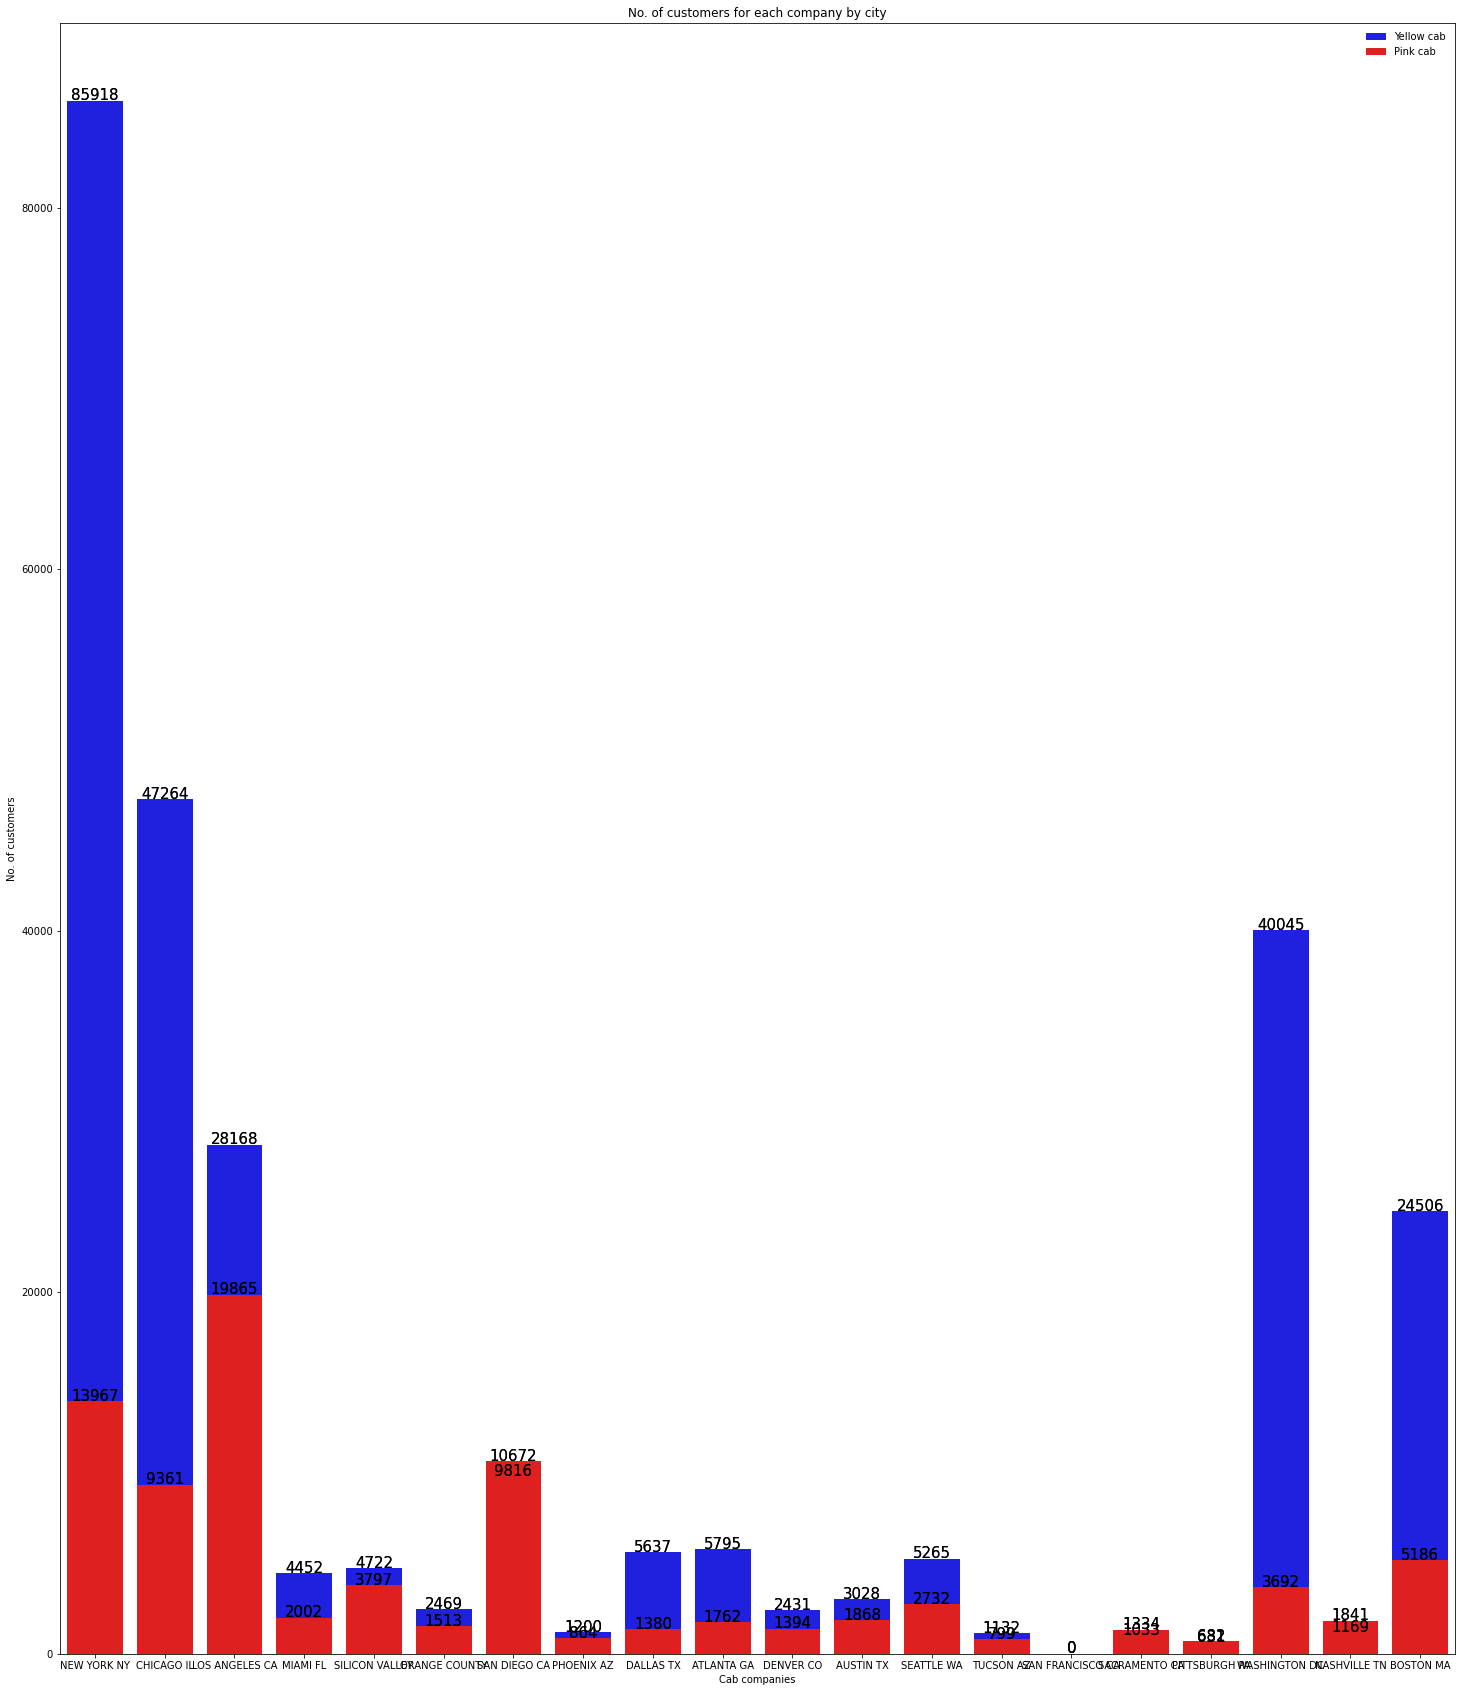

In [20]:
#City.plot.bar(x='City',stacked=True)
# Defining the plot size
plt.figure(figsize=(5, 5))
 
# Defining the values for x-axis, y-axis
# and from which dataframe the values are to be picked
fig_dims = (25, 30)

fig, ax = plt.subplots(figsize=fig_dims)
plots = sns.barplot(x="City", y="Yellow cab", data=City,color="Blue",label="Yellow cab")
plots1 = sns.barplot(x="City", y="Pink cab", data=City,color="Red",label="Pink cab")
# Iterrating over the bars one-by-one
for bar in plots.patches:
   
   
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 5),
                   textcoords='offset points')
for bar in plots1.patches:
   
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    plots1.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 5),
                   textcoords='offset points')
 
# plt.legend(labels=["Yellow cab","Pink cab"])
plt.legend(frameon = False)
plt.xlabel("Cab companies")
plt.ylabel("No. of customers")
plt.title("No. of customers for each company by city")
plt.show()


In [21]:
Profit=[Cab["Company"],Cab["Profit"]]
headers=["Company","Profit"]
Profit_Df=pd.concat(Profit, axis=1, keys=headers)
Profit_Df


,Company,Profit
0,Pink Cab,57.3150
1,Pink Cab,23.6660
2,Pink Cab,27.5680
3,Pink Cab,25.7980
4,Pink Cab,16.8440
...,...,...
359387,Yellow Cab,5.8800
359388,Yellow Cab,6.9020
359389,Yellow Cab,87.4200
359390,Yellow Cab,32.1420


The next plot shows that Yellow cab has much more customers than pink cab which reflects many factors like better car's conditions, better drivers, better offers. 

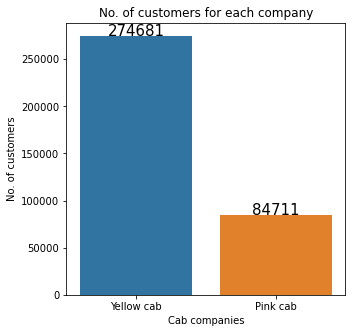

In [22]:
yellow=cab_cust[cab_cust["Company"]=="Yellow Cab"]
pink=cab_cust[cab_cust["Company"]=="Pink Cab"]
pink_count=pink.shape[0]
yellow_count=yellow.shape[0]
data = {"Company":["Yellow cab","Pink cab"],"values":[yellow_count,pink_count]}
Company = list(data.keys())
values = list(data.values())
df = pd.DataFrame(data, columns=['Company', 'values'])
 
df
# Defining the plot size
plt.figure(figsize=(5, 5))
 
# Defining the values for x-axis, y-axis
# and from which dataframe the values are to be picked
plots = sns.barplot(x="Company", y="values", data=df)
 
# Iterrating over the bars one-by-one
for bar in plots.patches:
   
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 5),
                   textcoords='offset points')
 
plt.xlabel("Cab companies")
plt.ylabel("No. of customers")
plt.title("No. of customers for each company")
plt.show()

In [23]:
Profit_Yellow_DF=Profit_Df[Profit_Df["Company"]=="Yellow Cab"]
Profit_Pink_DF=Profit_Df[Profit_Df["Company"]=="Pink Cab"]
Profit_Yellow=Profit_Yellow_DF["Profit"].sum()
Profit_Pink=Profit_Pink_DF["Profit"].sum()

# It seems that the cab industry is profitable, in the next plot we can deduce that The profit in three years was 49,327,701 $ and the majority of the profit is for Yellow cab company since it got more customers

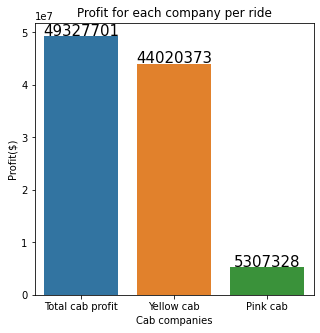

In [24]:
data_p = {"Company":["Total cab profit","Yellow cab","Pink cab"],"values":[Profit_Df['Profit'].sum(),Profit_Yellow, Profit_Pink]}
# Company = list(data1.keys())
# values = list(data1.values())
  
df1 = pd.DataFrame(data_p, columns=['Company', 'values'])
 
#df1
# Defining the plot size
plt.figure(figsize=(5, 5))
 
# Defining the values for x-axis, y-axis
# and from which dataframe the values are to be picked
plots = sns.barplot(x="Company", y="values", data=df1)
 
# Iterrating over the bars one-by-one
for bar in plots.patches:
   
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 5),
                   textcoords='offset points')
plt.xlabel("Cab companies")
plt.ylabel("Profit($)")
plt.title("Profit for each company per ride")
plt.show()

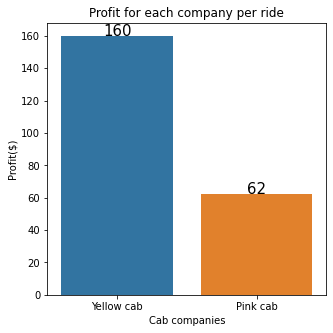

In [25]:

#print(math.floor(Profit_Pink),math.floor(Profit_Yellow))
data1 = {"Company":["Yellow cab","Pink cab"],"values":[math.floor(Profit_Yellow/yellow.shape[0]), math.floor(Profit_Pink/pink.shape[0])]}
Company = list(data1.keys())
values = list(data1.values())
  
df1 = pd.DataFrame(data1, columns=['Company', 'values'])
 
df1
# Defining the plot size
plt.figure(figsize=(5, 5))
 
# Defining the values for x-axis, y-axis
# and from which dataframe the values are to be picked
plots = sns.barplot(x="Company", y="values", data=df1)
 
# Iterrating over the bars one-by-one
for bar in plots.patches:
   
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 5),
                   textcoords='offset points')
plt.xlabel("Cab companies")
plt.ylabel("Profit($)")
plt.title("Profit for each company per ride")
plt.show()

In [26]:
income_max=Cust_Cab["Income (USD/Month)"].max()
income_min=Cust_Cab["Income (USD/Month)"].min()
income_avg=math.floor(Cust_Cab["Income (USD/Month)"].sum()/Cust_Cab.shape[0])
print(income_max,income_min,income_avg)

35000 2000 15048


In [27]:
High_class=Cust_Cab[Cust_Cab["Income (USD/Month)"]>15000]
Mid_class=Cust_Cab[(Cust_Cab["Income (USD/Month)"]<15000) & (Cust_Cab["Income (USD/Month)"]>2800)]
Low_class=Cust_Cab[Cust_Cab["Income (USD/Month)"]<2800]

In [28]:
Mid_count=Mid_class.shape[0]
High_count=High_class.shape[0]
Low_count=Low_class.shape[0]
print(High_count,Mid_count,Low_count)

175520 172791 11067


This class segmentation that high and middle class use cabs more frequently than low class, so we should refer to which company that has more customers in rich states so it will has more cutomers, which we can investigate from the above plot that yellow cab is better choice to invest at.

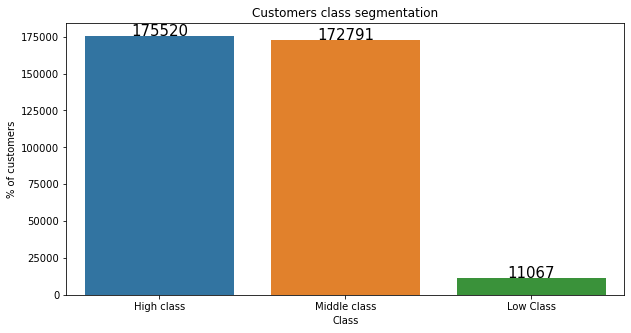

In [29]:
data_classes = {"Class":["High class", "Middle class", 'Low Class'],"values_classes":[High_count,Mid_count,Low_count]}
#Classes = list(data_classes.keys())
#values_classes= list(data_classes.values)
df1 = pd.DataFrame(data_classes, columns=['Class', 'values_classes'])

df1   
fig_classes = plt.figure(figsize = (10, 5))

# and from which dataframe the values are to be picked
plots = sns.barplot(x="Class", y="values_classes", data=df1)
 
for bar in plots.patches:
   

    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 5),
                   textcoords='offset points') 
 
plt.xlabel("Class")
plt.ylabel("%"" of customers")
plt.title("Customers class segmentation")
plt.show()

In [30]:
exits="SAN FRANCISCO CA" in Cab["City"]
print(exits)

False


In [31]:
Date=Cust_Cab["Date of Travel"]

In [32]:
from datetime import datetime, timedelta

def from_excel_ordinal(ordinal, _epoch0=datetime(1899, 12, 31)):
    if ordinal >= 60:
        ordinal -= 1  
    return (_epoch0 + timedelta(days=ordinal)).replace(microsecond=0)


In [33]:
print(type(Date))
Date_updated=np.array(Date)
print(type(Date_updated))
fx=Date.astype(int)
x=list(fx)
x2=list(fx)
print(timedelta(x[0]))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
42377 days, 0:00:00


In [34]:
for i in range(len(x)):
    x[i]=from_excel_ordinal(x[i])


In [35]:
def xldate_to_datetime(xldate):
    temp = datetime(1900, 1, 1)
    delta = timedelta(xldate)
    return temp+delta

In [36]:
Cust_Cab2=Cust_Cab
Cust_Cab2

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,10000011,29290,Card,Male,28,10813,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150
1,10351127,29290,Cash,Male,28,10813,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772
2,10412921,29290,Card,Male,28,10813,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480
3,10000012,27703,Card,Male,27,9237,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660
4,10320494,27703,Card,Male,27,9237,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,38520,Card,Female,42,19417,43107,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,47.2656
359388,10439799,12490,Cash,Male,33,18713,43103,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,105.0980
359389,10439838,41414,Card,Male,38,3960,43104,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,71.2100
359390,10439840,41677,Cash,Male,23,19454,43106,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,21.8600


In [37]:
import xlrd
import datetime as dt
    
def from_excel_datetime(x):
    return dt.datetime(*xlrd.xldate_as_tuple(x, datemode=0))



In [38]:
Cust_Cab2.rename(columns = {'Date of Travel':'Date_of_Travel'}, inplace = True)
Cust_Cab2

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date_of_Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,10000011,29290,Card,Male,28,10813,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150
1,10351127,29290,Cash,Male,28,10813,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772
2,10412921,29290,Card,Male,28,10813,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480
3,10000012,27703,Card,Male,27,9237,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660
4,10320494,27703,Card,Male,27,9237,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,38520,Card,Female,42,19417,43107,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,47.2656
359388,10439799,12490,Cash,Male,33,18713,43103,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,105.0980
359389,10439838,41414,Card,Male,38,3960,43104,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,71.2100
359390,10439840,41677,Cash,Male,23,19454,43106,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,21.8600


In [39]:
Cust_Cab2['Date_of_Travel'] = Cust_Cab2.Date_of_Travel.map(from_excel_datetime)

In [40]:
Cust_Cab2


,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date_of_Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,10000011,29290,Card,Male,28,10813,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150
1,10351127,29290,Cash,Male,28,10813,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772
2,10412921,29290,Card,Male,28,10813,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480
3,10000012,27703,Card,Male,27,9237,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660
4,10320494,27703,Card,Male,27,9237,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,38520,Card,Female,42,19417,2018-01-07,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,47.2656
359388,10439799,12490,Cash,Male,33,18713,2018-01-03,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,105.0980
359389,10439838,41414,Card,Male,38,3960,2018-01-04,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,71.2100
359390,10439840,41677,Cash,Male,23,19454,2018-01-06,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,21.8600


In [41]:
z=Cust_Cab2['Date_of_Travel']

In [42]:
Cust_Cab2.to_csv('Cab_Final.csv')

### The date here starts from 8/1/2016 although it was mentioned that the data starts from 31/1/2016 which may be considered as outlier

In [43]:
#Final=pd.read_csv("Cab_Final.csv")
#del Final['Unnamed']
#Final["Date_of_Travel"]=Cust_Cab2["Date_of_Travel"]
#Final

In [44]:
#x=Final['Date_of_Travel']
#for i in range(len(x)):
#    Final['Year'][i]=x[i].year

In [45]:
#Final.to_csv("Final.csv")
Final=pd.read_csv("Final.csv")

In [46]:
#del Final['Unnamed']
Final['Date_of_Travel']=Cust_Cab2['Date_of_Travel']
Final


,Unnamed,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date_of_Travel,Year,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,0,10000011,29290,Card,Male,28,10813,2016-01-08,2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150
1,1,10351127,29290,Cash,Male,28,10813,2018-07-21,2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772
2,2,10412921,29290,Card,Male,28,10813,2018-11-23,2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480
3,3,10000012,27703,Card,Male,27,9237,2016-01-06,2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660
4,4,10320494,27703,Card,Male,27,9237,2018-04-21,2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,359387,10439790,38520,Card,Female,42,19417,2018-01-07,2018,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,47.2656
359388,359388,10439799,12490,Cash,Male,33,18713,2018-01-03,2018,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,105.0980
359389,359389,10439838,41414,Card,Male,38,3960,2018-01-04,2018,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,71.2100
359390,359390,10439840,41677,Cash,Male,23,19454,2018-01-06,2018,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,21.8600


In [47]:
Profit_Yellow_DF.insert(2,'Year',Final['Year'])
Profit_Yellow_DF

,Company,Profit,Year
233,Yellow Cab,877.0076,2018
234,Yellow Cab,895.7768,2018
235,Yellow Cab,232.3320,2018
236,Yellow Cab,504.1600,2018
237,Yellow Cab,944.1908,2016
...,...,...,...
359387,Yellow Cab,5.8800,2018
359388,Yellow Cab,6.9020,2018
359389,Yellow Cab,87.4200,2018
359390,Yellow Cab,32.1420,2018


In [48]:
Profit_Yellow_DF['Profit'].sum()

44020373.17080001

In [49]:
Profit_Yellow_DF_2016=Profit_Yellow_DF[Profit_Yellow_DF['Year']==2016]
Profit_Yellow_DF_2017=Profit_Yellow_DF[Profit_Yellow_DF['Year']==2017]
Profit_Yellow_DF_2018=Profit_Yellow_DF[Profit_Yellow_DF['Year']==2018]
Profit_Yellow_DF_2016

,Company,Profit,Year
237,Yellow Cab,944.1908,2016
238,Yellow Cab,199.2476,2016
239,Yellow Cab,601.2400,2016
240,Yellow Cab,700.5072,2016
241,Yellow Cab,582.2420,2016
...,...,...,...
331954,Yellow Cab,218.9104,2016
331969,Yellow Cab,81.3500,2016
332044,Yellow Cab,111.5488,2016
332055,Yellow Cab,33.1088,2016


In [50]:
profit_2016=Profit_Yellow_DF_2016['Profit'].sum()
profit_2017=Profit_Yellow_DF_2017['Profit'].sum()
profit_2018=Profit_Yellow_DF_2018['Profit'].sum()
print(profit_2016)

13375285.069600001


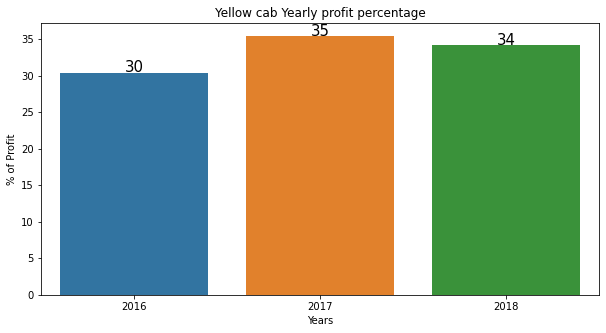

In [51]:
data_classes = {"Year":['2016',"2017","2018"],"Profit":[(profit_2016/Profit_Yellow)*100, (profit_2017/Profit_Yellow)*100, (profit_2018/Profit_Yellow)*100]}

df1 = pd.DataFrame(data_classes, columns=['Year', 'Profit'])

df1   
fig_classes = plt.figure(figsize = (10, 5))

plots = sns.barplot(x="Year", y="Profit", data=df1)
 
for bar in plots.patches:
   
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 5),
                   textcoords='offset points')   

 
plt.xlabel("Years")
plt.ylabel("%"" of Profit")
plt.title("Yellow cab Yearly profit percentage")
plt.show()

In [52]:
Profit_Pink_DF.insert(2,'Year',Final['Year'])
#del Profit_Pink_DF["Year"]
Profit_Pink_DF

,Company,Profit,Year
0,Pink Cab,57.315,2016
1,Pink Cab,23.666,2018
2,Pink Cab,27.568,2018
3,Pink Cab,25.798,2016
4,Pink Cab,16.844,2018
...,...,...,...
357449,Pink Cab,48.590,2018
357450,Pink Cab,85.344,2018
357451,Pink Cab,58.390,2018
357452,Pink Cab,31.560,2018


In [53]:
Profit_Pink=Profit_Pink_DF['Profit'].sum()
Profit_Pink_DF_2016=Profit_Pink_DF[Profit_Pink_DF['Year']==2016]
Profit_Pink_DF_2017=Profit_Pink_DF[Profit_Pink_DF['Year']==2017]
Profit_Pink_DF_2018=Profit_Pink_DF[Profit_Pink_DF['Year']==2018]
profit_2016_Pink=Profit_Pink_DF_2016['Profit'].sum()
profit_2017_Pink=Profit_Pink_DF_2017['Profit'].sum()
profit_2018_Pink=Profit_Pink_DF_2018['Profit'].sum()
print(profit_2016_Pink,profit_2017)

1554717.059 15591146.6956


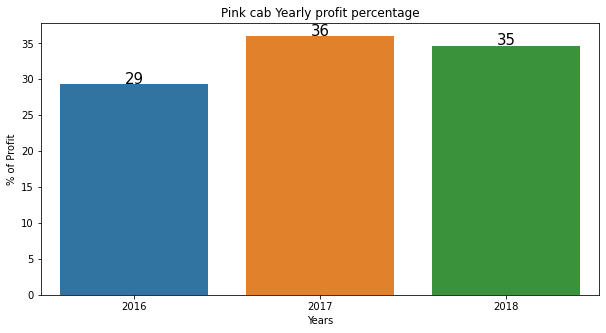

In [54]:
data_classes = {"Year":['2016',"2017","2018"],"Profit":[(profit_2016_Pink/Profit_Pink)*100, (profit_2017_Pink/Profit_Pink)*100, (profit_2018_Pink/Profit_Pink)*100]}

df1 = pd.DataFrame(data_classes, columns=['Year', 'Profit'])

df1   
fig_classes = plt.figure(figsize = (10, 5))
plots = sns.barplot(x="Year", y="Profit", data=df1)
 
# Iterrating over the bars one-by-one
for bar in plots.patches:
   

    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 5),
                   textcoords='offset points')   

 
plt.xlabel("Years")
plt.ylabel("%"" of Profit")
plt.title("Pink cab Yearly profit percentage")
plt.show()

In [55]:
def my_value(number):
    return ("{:,}".format(number))


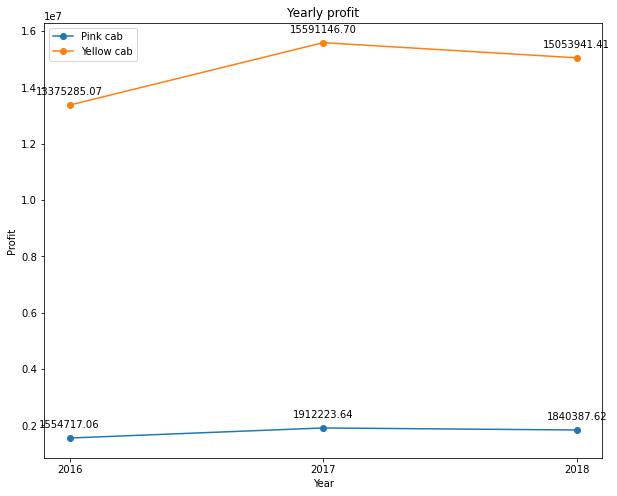

In [56]:
pink1=[profit_2016_Pink,profit_2017_Pink,profit_2018_Pink]
yellow1=[profit_2016,profit_2017,profit_2018]
x_years=['2016','2017','2018']
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
plt.xlabel('Year')
plt.ylabel('Profit')
plt.plot(x_years, pink1,marker='o')
plt.plot(x_years, yellow1,marker='o')
for x,y in zip(x_years,yellow1):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')
for x,y in zip(x_years,pink1):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')
plt.legend(['Pink cab','Yellow cab'])
plt.title("Yearly profit")
plt.show()

In [57]:
Km_comp=[Final["Customer ID"],Final["KM Travelled"],Final["Company"]]
headers_km=["Customer_ID","Km","Company"]
Kmdf=pd.concat(Km_comp, axis=1, keys=headers_km)
print(Kmdf["Km"].min(),Kmdf["Km"].max())

1.9 48.0


In [58]:
Km_comp_yellow=Final.loc[Final["Company"]=="Yellow Cab"]
yd=[Km_comp_yellow["Customer ID"],Km_comp_yellow["KM Travelled"],Km_comp_yellow["Company"]]
headers_yellow=["Customer_ID","Km","Company"]
Kmdf_yellow=pd.concat(yd, axis=1, keys=headers_km)
Kmdf_yellow

,Customer_ID,Km,Company
1,29290,26.19,Yellow Cab
2,29290,42.55,Yellow Cab
4,27703,36.38,Yellow Cab
5,27703,6.18,Yellow Cab
8,28712,39.60,Yellow Cab
...,...,...,...
359387,38520,16.66,Yellow Cab
359388,12490,13.72,Yellow Cab
359389,41414,19.00,Yellow Cab
359390,41677,5.60,Yellow Cab


In [59]:
Km_comp_pink=Final.loc[Final["Company"]=="Pink Cab"]
yd=[Km_comp_pink["Customer ID"],Km_comp_pink["KM Travelled"],Km_comp_pink["Company"]]
headers_pink=["Customer_ID","Km","Company"]
Kmdf_pink=pd.concat(yd, axis=1, keys=headers_km)
Kmdf_pink

,Customer_ID,Km,Company
0,29290,30.45,Pink Cab
3,27703,28.62,Pink Cab
6,27703,13.39,Pink Cab
7,28712,9.04,Pink Cab
11,28020,33.17,Pink Cab
...,...,...,...
359331,47760,31.03,Pink Cab
359332,18620,26.73,Pink Cab
359333,14974,22.23,Pink Cab
359334,41135,35.96,Pink Cab


In [60]:
yellow_05=Kmdf_yellow[(Kmdf_yellow["Km"]>=0) & (Kmdf_yellow['Km']<5)]
yellow_510=Kmdf_yellow[(Kmdf_yellow["Km"]>=5) & (Kmdf_yellow['Km']<10)]
yellow_1015=Kmdf_yellow[(Kmdf_yellow["Km"]>=10) & (Kmdf_yellow['Km']<15)]
yellow_1520=Kmdf_yellow[(Kmdf_yellow["Km"]>=15) & (Kmdf_yellow['Km']<20)]
yellow_2025=Kmdf_yellow[(Kmdf_yellow["Km"]>=20) & (Kmdf_yellow['Km']<25)]
yellow_2530=Kmdf_yellow[(Kmdf_yellow["Km"]>=25) & (Kmdf_yellow['Km']<30)]
yellow_3035=Kmdf_yellow[(Kmdf_yellow["Km"]>=30) & (Kmdf_yellow['Km']<35)]
yellow_3540=Kmdf_yellow[(Kmdf_yellow["Km"]>=35) & (Kmdf_yellow['Km']<40)]
yellow_4045=Kmdf_yellow[(Kmdf_yellow["Km"]>=40) & (Kmdf_yellow['Km']<45)]
yellow_4550=Kmdf_yellow[(Kmdf_yellow["Km"]>=45) & (Kmdf_yellow['Km']<50)]
#***********************************
pink_05=Kmdf_pink[(Kmdf_pink["Km"]>=0) & (Kmdf_pink['Km']<5)]
pink_510=Kmdf_pink[(Kmdf_pink["Km"]>=5) & (Kmdf_pink['Km']<10)]
pink_1015=Kmdf_pink[(Kmdf_pink["Km"]>=10) & (Kmdf_pink['Km']<15)]
pink_1520=Kmdf_pink[(Kmdf_pink["Km"]>=15) & (Kmdf_pink['Km']<20)]
pink_2025=Kmdf_pink[(Kmdf_pink["Km"]>=20) & (Kmdf_pink['Km']<25)]
pink_2530=Kmdf_pink[(Kmdf_pink["Km"]>=25) & (Kmdf_pink['Km']<30)]
pink_3035=Kmdf_pink[(Kmdf_pink["Km"]>=30) & (Kmdf_pink['Km']<35)]
pink_3540=Kmdf_pink[(Kmdf_pink["Km"]>=35) & (Kmdf_pink['Km']<40)]
pink_4045=Kmdf_pink[(Kmdf_pink["Km"]>=40) & (Kmdf_pink['Km']<45)]
pink_4550=Kmdf_pink[(Kmdf_pink["Km"]>=45) & (Kmdf_pink['Km']<50)]

In [61]:
pink_05['Km'].count()

6895

In [62]:
y05=yellow_05['Km'].count()
data_classes = {"Class":["High class", "Middle class", 'Low Class'],"values_classes":[High_count,Mid_count,Low_count]}
data_yellow = {"KM":["0-5", "5-10", "10-15","15-20","20-25","25-30","30-35","35-40","40-45","45-50"],"vals":[yellow_05['Km'].count(),yellow_510['Km'].count(),yellow_1015['Km'].count(),yellow_1520['Km'].count(),yellow_2025['Km'].count(),yellow_2530['Km'].count(),yellow_3035['Km'].count(),yellow_3540['Km'].count(),yellow_4045['Km'].count(),yellow_4550['Km'].count()]}
data_pink = {"KM":["0-5", "5-10", "10-15","15-20","20-25","25-30","30-35","35-40","40-45","45-50"],"vals":[pink_05['Km'].count(),pink_510['Km'].count(),pink_1015['Km'].count(),pink_1520['Km'].count(),pink_2025['Km'].count(),pink_2530['Km'].count(),pink_3035['Km'].count(),pink_3540['Km'].count(),pink_4045['Km'].count(),pink_4550['Km'].count()]}
#Classes = list(data_classes.keys())
#values_classes= list(data_classes.values)
dfy = pd.DataFrame(data_yellow, columns=['KM', 'vals'])
dfp = pd.DataFrame(data_pink, columns=['KM', 'vals'])
dfp
 
# Defining the values for x-axis, y-axis
# and from which dataframe the values are to be picked

#print(yellow_05['Km'].count(),yellow_510['Km'].count(),yellow_1015['Km'].count(),yellow_1520['Km'].count(),yellow_2025['Km'].count(),yellow_2530['Km'].count(),yellow_3035['Km'].count(),yellow_3540['Km'].count(),yellow_4045['Km'].count(),yellow_4550['Km'].count())

,KM,vals
0,0-5,6895
1,5-10,10190
2,10-15,10068
3,15-20,10319
4,20-25,10131
5,25-30,10077
6,30-35,10109
7,35-40,9867
8,40-45,5791
9,45-50,1264


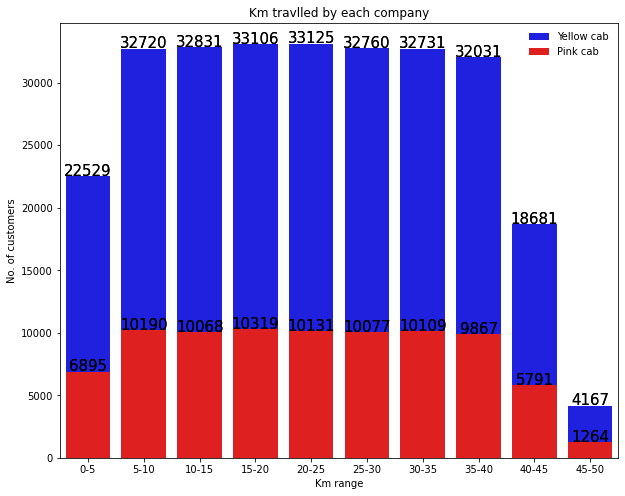

In [63]:
fig_dims = (10, 8)

fig, ax = plt.subplots(figsize=fig_dims)
plotsy = sns.barplot(x="KM", y="vals", data=data_yellow,color="Blue",label="Yellow cab")
plotsp = sns.barplot(x="KM", y="vals", data=data_pink,color="Red",label="Pink cab")
# Iterrating over the bars one-by-one
for bar in plotsy.patches:
   
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    plotsy.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 5),
                   textcoords='offset points')
for bar in plotsp.patches:
   
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    plotsp.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 5),
                   textcoords='offset points')
plt.legend(frameon = False)
plt.xlabel("Km range")
plt.ylabel("No. of customers")
plt.title("Km travlled by each company")
plt.show()

In [64]:
date_data=[Final["Customer ID"],Final["Date_of_Travel"]]
headers_date=["Cust ID","Date"]
Date_df=pd.concat(date_data, axis=1, keys=headers_date)
Date_df.index=Date_df['Date']
del Date_df['Date']
Date_df

,Cust ID
Date,
2016-01-08,29290
2018-07-21,29290
2018-11-23,29290
2016-01-06,27703
2018-04-21,27703
...,...
2018-01-07,38520
2018-01-03,12490
2018-01-04,41414


In [68]:
x=Final['Date_of_Travel']
# Days=[]
# Month=[]
 
# for i in range(len(x)):
#     Days.append(0)
#     Month.append(0)
# Final.insert(8,"Month",Month)
# Final.insert(9,"Day",Days)
for i in range(len(x)):
    Final['Month'][i]=x[i].month
    Final['Day'][i]=x[i].day
Final

C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


KeyboardInterrupt: 

In [69]:
#Final.to_csv("Final_mod.csv")
Final=pd.read_csv("Final_mod.csv")
del Final["Unnamed"]
Final['Date_of_Travel']=Cust_Cab2['Date_of_Travel']
Final

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date_of_Travel,Year,Month,Day,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,10000011,29290,Card,Male,28,10813,2016-01-08,2016,1,8,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150
1,10351127,29290,Cash,Male,28,10813,2018-07-21,2018,7,21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772
2,10412921,29290,Card,Male,28,10813,2018-11-23,2018,11,23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480
3,10000012,27703,Card,Male,27,9237,2016-01-06,2016,1,6,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660
4,10320494,27703,Card,Male,27,9237,2018-04-21,2018,4,21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,38520,Card,Female,42,19417,2018-01-07,2018,1,7,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,47.2656
359388,10439799,12490,Cash,Male,33,18713,2018-01-03,2018,1,3,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,105.0980
359389,10439838,41414,Card,Male,38,3960,2018-01-04,2018,1,4,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,71.2100
359390,10439840,41677,Cash,Male,23,19454,2018-01-06,2018,1,6,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,21.8600


In [70]:
Days_01=Final[(Final['Day']==1) & (Final['Company']=="Yellow Cab")]
Days_02=Final[(Final['Day']==2)& (Final['Company']=="Yellow Cab")]
Days_03=Final[(Final['Day']==3)& (Final['Company']=="Yellow Cab")]
Days_04=Final[(Final['Day']==4) & (Final['Company']=="Yellow Cab")]
Days_05=Final[(Final['Day']==5) & (Final['Company']=="Yellow Cab")]
Days_06=Final[(Final['Day']==6) & (Final['Company']=="Yellow Cab")]
Days_07=Final[(Final['Day']==7) & (Final['Company']=="Yellow Cab")]
Days_08=Final[(Final['Day']==8) & (Final['Company']=="Yellow Cab")]
Days_09=Final[(Final['Day']==9) & (Final['Company']=="Yellow Cab")]
Days_10=Final[(Final['Day']==10) & (Final['Company']=="Yellow Cab")]
Days_11=Final[(Final['Day']==11) & (Final['Company']=="Yellow Cab")]
Days_12=Final[(Final['Day']==12) & (Final['Company']=="Yellow Cab")]
Days_13=Final[(Final['Day']==13) & (Final['Company']=="Yellow Cab")]
Days_14=Final[(Final['Day']==14) & (Final['Company']=="Yellow Cab")]
Days_15=Final[(Final['Day']==15) & (Final['Company']=="Yellow Cab")]
Days_16=Final[(Final['Day']==16) & (Final['Company']=="Yellow Cab")]
Days_17=Final[(Final['Day']==17) & (Final['Company']=="Yellow Cab")]
Days_18=Final[(Final['Day']==18) & (Final['Company']=="Yellow Cab")]
Days_19=Final[(Final['Day']==19) & (Final['Company']=="Yellow Cab")]
Days_20=Final[(Final['Day']==20) & (Final['Company']=="Yellow Cab")]
Days_21=Final[(Final['Day']==21) & (Final['Company']=="Yellow Cab")]
Days_22=Final[(Final['Day']==22) & (Final['Company']=="Yellow Cab")]
Days_23=Final[(Final['Day']==23) & (Final['Company']=="Yellow Cab")]
Days_24=Final[(Final['Day']==24) & (Final['Company']=="Yellow Cab")]
Days_25=Final[(Final['Day']==25) & (Final['Company']=="Yellow Cab")]
Days_26=Final[(Final['Day']==26) & (Final['Company']=="Yellow Cab")]
Days_27=Final[(Final['Day']==27) & (Final['Company']=="Yellow Cab")]
Days_28=Final[(Final['Day']==28) & (Final['Company']=="Yellow Cab")]
Days_29=Final[(Final['Day']==29) & (Final['Company']=="Yellow Cab")]
Days_30=Final[(Final['Day']==30) & (Final['Company']=="Yellow Cab")]
Days_31=Final[(Final['Day']==31) & (Final['Company']=="Yellow Cab")]

In [71]:
Days_01_p=Final[(Final['Day']==1) & (Final['Company']=="Pink Cab")]
Days_02_p=Final[(Final['Day']==2)& (Final['Company']=="Pink Cab")]
Days_03_p=Final[(Final['Day']==3)& (Final['Company']=="Pink Cab")]
Days_04_p=Final[(Final['Day']==4) & (Final['Company']=="Pink Cab")]
Days_05_p=Final[(Final['Day']==5) & (Final['Company']=="Pink Cab")]
Days_06_p=Final[(Final['Day']==6) & (Final['Company']=="Pink Cab")]
Days_07_p=Final[(Final['Day']==7) & (Final['Company']=="Pink Cab")]
Days_08_p=Final[(Final['Day']==8) & (Final['Company']=="Pink Cab")]
Days_09_p=Final[(Final['Day']==9) & (Final['Company']=="Pink Cab")]
Days_10_p=Final[(Final['Day']==10) & (Final['Company']=="Pink Cab")]
Days_11_p=Final[(Final['Day']==11) & (Final['Company']=="Pink Cab")]
Days_12_p=Final[(Final['Day']==12) & (Final['Company']=="Pink Cab")]
Days_13_p=Final[(Final['Day']==13) & (Final['Company']=="Pink Cab")]
Days_14_p=Final[(Final['Day']==14) & (Final['Company']=="Pink Cab")]
Days_15_p=Final[(Final['Day']==15) & (Final['Company']=="Pink Cab")]
Days_16_p=Final[(Final['Day']==16) & (Final['Company']=="Pink Cab")]
Days_17_p=Final[(Final['Day']==17) & (Final['Company']=="Pink Cab")]
Days_18_p=Final[(Final['Day']==18) & (Final['Company']=="Pink Cab")]
Days_19_p=Final[(Final['Day']==19) & (Final['Company']=="Pink Cab")]
Days_20_p=Final[(Final['Day']==20) & (Final['Company']=="Pink Cab")]
Days_21_p=Final[(Final['Day']==21) & (Final['Company']=="Pink Cab")]
Days_22_p=Final[(Final['Day']==22) & (Final['Company']=="Pink Cab")]
Days_23_p=Final[(Final['Day']==23) & (Final['Company']=="Pink Cab")]
Days_24_p=Final[(Final['Day']==24) & (Final['Company']=="Pink Cab")]
Days_25_p=Final[(Final['Day']==25) & (Final['Company']=="Pink Cab")]
Days_26_p=Final[(Final['Day']==26) & (Final['Company']=="Pink Cab")]
Days_27_p=Final[(Final['Day']==27) & (Final['Company']=="Pink Cab")]
Days_28_p=Final[(Final['Day']==28) & (Final['Company']=="Pink Cab")]
Days_29_p=Final[(Final['Day']==29) & (Final['Company']=="Pink Cab")]
Days_30_p=Final[(Final['Day']==30) & (Final['Company']=="Pink Cab")]
Days_31_p=Final[(Final['Day']==31) & (Final['Company']=="Pink Cab")]

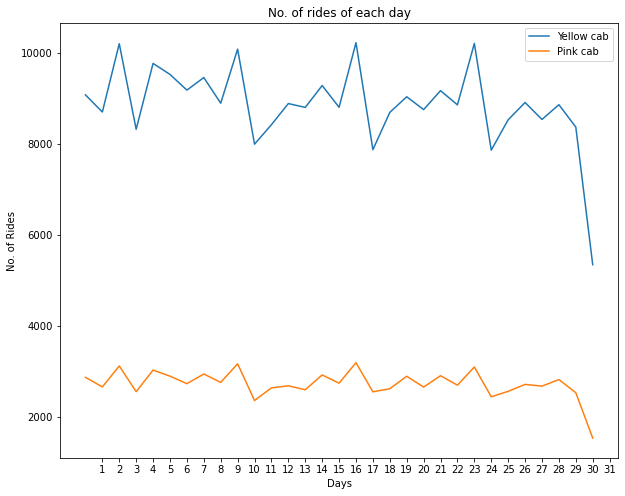

In [72]:
days_data={"Day":["01","02","03","04","05","06","07","08","09","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25","26","27","28","29","30","31"]
,"val":[Days_01['Day'].count(),Days_02['Day'].count(),Days_03['Day'].count(),Days_04['Day'].count(),Days_05['Day'].count(),Days_06['Day'].count(),
Days_07['Day'].count(),Days_08['Day'].count(),Days_09['Day'].count(),Days_10['Day'].count(),Days_11['Day'].count(),Days_12['Day'].count(),Days_13['Day'].count(),Days_14['Day'].count(),
Days_15['Day'].count(),Days_16['Day'].count(),Days_17['Day'].count(),Days_18['Day'].count(),Days_19['Day'].count(),Days_20['Day'].count(),Days_21['Day'].count(),Days_22['Day'].count(),
Days_23['Day'].count(),Days_24['Day'].count(),Days_25['Day'].count(),Days_26['Day'].count(),Days_27['Day'].count(),Days_28['Day'].count(),Days_29['Day'].count(),Days_30['Day'].count(),Days_31['Day'].count()]}
days_df=pd.DataFrame(days_data, columns=['Day', 'val'])
days_df
days_data_p={"Day":["01","02","03","04","05","06","07","08","09","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25","26","27","28","29","30","31"]
,"val":[Days_01_p['Day'].count(),Days_02_p['Day'].count(),Days_03_p['Day'].count(),Days_04_p['Day'].count(),Days_05_p['Day'].count(),Days_06_p['Day'].count(),
Days_07_p['Day'].count(),Days_08_p['Day'].count(),Days_09_p['Day'].count(),Days_10_p['Day'].count(),Days_11_p['Day'].count(),Days_12_p['Day'].count(),Days_13_p['Day'].count(),Days_14_p['Day'].count(),
Days_15_p['Day'].count(),Days_16_p['Day'].count(),Days_17_p['Day'].count(),Days_18_p['Day'].count(),Days_19_p['Day'].count(),Days_20_p['Day'].count(),Days_21_p['Day'].count(),Days_22_p['Day'].count(),
Days_23_p['Day'].count(),Days_24_p['Day'].count(),Days_25_p['Day'].count(),Days_26_p['Day'].count(),Days_27_p['Day'].count(),Days_28_p['Day'].count(),Days_29_p['Day'].count(),Days_30_p['Day'].count(),Days_31_p['Day'].count()]}
days_df_p=pd.DataFrame(days_data_p, columns=['Day', 'val'])
# days_df.plot.line()
# days_df_p.plot.line()
# plt.figure(figsize=(3, 20))
plt.rcParams['figure.figsize'] = [10, 8]
ax = days_df.plot()
days_df_p.plot(ax=ax)
plt.xticks(np.arange(1, 32, step=1)) 
plt.legend(['Yellow cab','Pink cab'])
plt.title("No. of rides of each day")
plt.xlabel("Days")
plt.ylabel("No. of Rides")
plt.show()

In [73]:
Month_01=Final[(Final['Month']==1) & (Final['Company']=="Yellow Cab")]
Month_02=Final[(Final['Month']==2) & (Final['Company']=="Yellow Cab")]
Month_03=Final[(Final['Month']==3) & (Final['Company']=="Yellow Cab")]
Month_04=Final[(Final['Month']==4) & (Final['Company']=="Yellow Cab")]
Month_05=Final[(Final['Month']==5) & (Final['Company']=="Yellow Cab")]
Month_06=Final[(Final['Month']==6) & (Final['Company']=="Yellow Cab")]
Month_07=Final[(Final['Month']==7) & (Final['Company']=="Yellow Cab")]
Month_08=Final[(Final['Month']==8) & (Final['Company']=="Yellow Cab")]
Month_09=Final[(Final['Month']==9) & (Final['Company']=="Yellow Cab")]
Month_10=Final[(Final['Month']==10) & (Final['Company']=="Yellow Cab")]
Month_11=Final[(Final['Month']==11) & (Final['Company']=="Yellow Cab")]
Month_12=Final[(Final['Month']==12) & (Final['Company']=="Yellow Cab")]
#***************************************************************************
Month_01_p=Final[(Final['Month']==1) & (Final['Company']=="Pink Cab")]
Month_02_p=Final[(Final['Month']==2) & (Final['Company']=="Pink Cab")]
Month_03_p=Final[(Final['Month']==3) & (Final['Company']=="Pink Cab")]
Month_04_p=Final[(Final['Month']==4) & (Final['Company']=="Pink Cab")]
Month_05_p=Final[(Final['Month']==5) & (Final['Company']=="Pink Cab")]
Month_06_p=Final[(Final['Month']==6) & (Final['Company']=="Pink Cab")]
Month_07_p=Final[(Final['Month']==7) & (Final['Company']=="Pink Cab")]
Month_08_p=Final[(Final['Month']==8) & (Final['Company']=="Pink Cab")]
Month_09_p=Final[(Final['Month']==9) & (Final['Company']=="Pink Cab")]
Month_10_p=Final[(Final['Month']==10) & (Final['Company']=="Pink Cab")]
Month_11_p=Final[(Final['Month']==11) & (Final['Company']=="Pink Cab")]
Month_12_p=Final[(Final['Month']==12) & (Final['Company']=="Pink Cab")]

In [74]:
Months_data={"Month":["01","02","03","04","05","06","07","08","09","10","11","12"]
,"val":[Month_01['Month'].count(),Month_02['Month'].count(),Month_03['Month'].count(),Month_04['Month'].count(),Month_05['Month'].count(),Month_06['Month'].count(),
Month_07['Month'].count(),Month_08['Month'].count(),Month_09['Month'].count(),Month_10['Month'].count(),Month_11['Month'].count(),Month_12['Month'].count()]}
Month_df=pd.DataFrame(Months_data, columns=['Month', 'val'])
#days_df
Months_data_p={"Month":["01","02","03","04","05","06","07","08","09","10","11","12"]
,"val":[Month_01_p['Month'].count(),Month_02_p['Month'].count(),Month_03_p['Month'].count(),Month_04_p['Month'].count(),Month_05_p['Month'].count(),Month_06_p['Month'].count(),
Month_07_p['Month'].count(),Month_08_p['Month'].count(),Month_09_p['Month'].count(),Month_10_p['Month'].count(),Month_11_p['Month'].count(),Month_12_p['Month'].count()]}
Month_df_p=pd.DataFrame(Months_data_p, columns=['Month', 'val'])


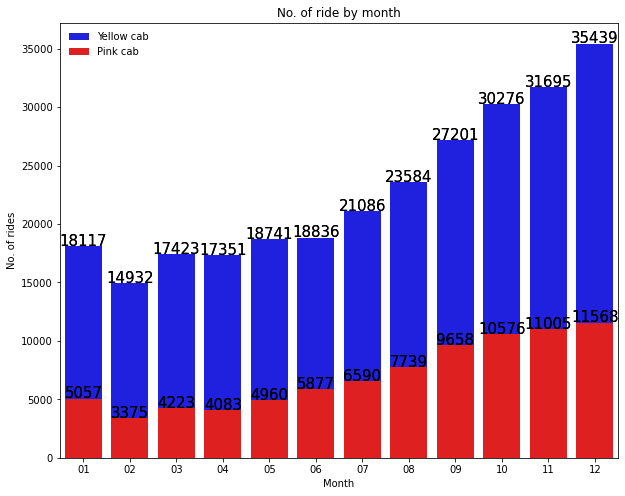

In [75]:
fig_dims = (10, 8)

fig, ax = plt.subplots(figsize=fig_dims)
plotsmy = sns.barplot(x="Month", y="val", data=Month_df,color="Blue",label="Yellow cab")
plotsmp = sns.barplot(x="Month", y="val", data=Month_df_p,color="Red",label="Pink cab")
# Iterrating over the bars one-by-one
for bar in plotsmy.patches:
   
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    plotsmy.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 5),
                   textcoords='offset points')
for bar in plotsmp.patches:
   
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    plotsmp.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 5),
                   textcoords='offset points')
plt.legend(frameon = False)
plt.xlabel("Month")
plt.ylabel("No. of rides")
plt.title("No. of ride by month")
plt.show()

### What could be concluded that Yellow cab got more customers in most of the states excpet 4 states where pink cab had more customers, larger profit and profit per ride, both companies had their highest profit in 2017 and lowest in 2016, the majority of the customers are from the high and miidle class, yellow cab has much more rides for long trips which indicates that they got more comfortable vechiles and better service, finally their is seasonality in the number of rides starting on the third day of each month and repeat each week.